In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
FLOWPATH ='/home/wuying/CODE/mymodel/2022/DL-Traff-Graph/PEMSBAY/pems-bay.h5'
data = pd.read_hdf(FLOWPATH).values
print('data.shape', data.shape)

data.shape (52116, 325)


FileNotFoundError: [Errno 2] No such file or directory: '../save/fig/png.pdf'

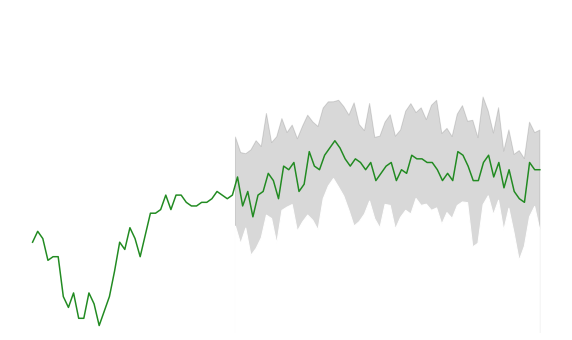

In [4]:
fig, ax = plt.subplots(figsize=(10,6))

start = 200
y = data[start:300,34]
y2 = data[start+40:300,34] + 1 + np.random.random_sample(60) * np.random.random_sample(60)
y3 = data[start+40:300,34] - 1 - np.random.random_sample(60)* np.random.random_sample(60)
x = np.linspace(0,len(y),len(y))
x2 = np.linspace(40,len(y),len(y2))
ax.plot(x,y,color = 'forestgreen')
# plt.plot(x2,y2)
# plt.plot(x2,y3)
ax.fill_between(x2, y2 , color='gray', alpha=0.3)
ax.fill_between(x2, y3 , color='white')
ax.set_ylim(63,72)

ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])

# plt.show()
plt.savefig('../save/fig/png.pdf', bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: '../save/fig/f2.png'

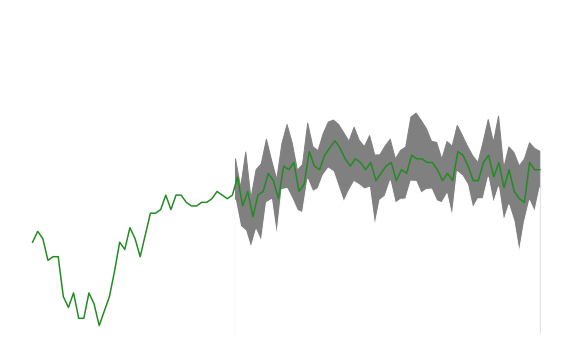

In [5]:
fig, ax = plt.subplots(figsize=(10,6))

start = 200
y = data[start:300,34]
y2 = data[start+40:300,34] + 0.5 + np.random.random_sample(60) * np.random.random_sample(60)
y3 = data[start+40:300,34] - 0.5 - np.random.random_sample(60)* np.random.random_sample(60)
x = np.linspace(0,len(y),len(y))
x2 = np.linspace(40,len(y),len(y2))
ax.plot(x,y,color = 'forestgreen')
# plt.plot(x2,y2)
# plt.plot(x2,y3)
ax.fill_between(x2, y2 , color='gray')
ax.fill_between(x2, y3 , color='white')
ax.set_ylim(63,72)

ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])

# plt.show()
plt.savefig('../save/fig/f2.png', bbox_inches='tight')

In [6]:
df = pd.read_hdf('../METRLA/metr-la.h5')
data = df.values

data = np.reshape(data, (-1, 288, 207))
print(data.shape)

time_idx = 12 * 8 
timestamp_data = data[:, time_idx, :]
timestamp_data.shape

node_mean = np.mean(timestamp_data, axis=0)
node_std = np.std(timestamp_data, axis=0)
node_idx = np.arange(207)
node_info = np.vstack([node_mean, node_std, node_idx]).transpose()

node_info = node_info[np.argsort(node_info[:,0])]

FileNotFoundError: File ../METRLA/metr-la.h5 does not exist

In [7]:
plt.plot(node_info[:,0])
plt.plot(node_info[:,1])


NameError: name 'node_info' is not defined

In [8]:
node_info[:,1]

NameError: name 'node_info' is not defined

NameError: name 'timestamp_data' is not defined

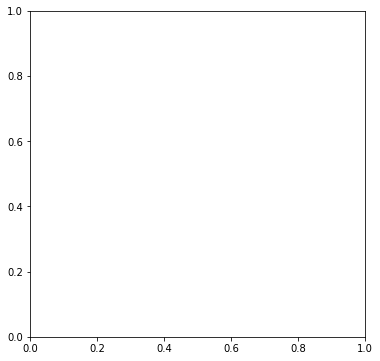

In [9]:

fig, ax = plt.subplots(figsize=(6,6))
plt.cla()
vals = [
    timestamp_data[:, int(node_info[109, 2])],
    timestamp_data[:, int(node_info[106, 2])],
    timestamp_data[:, int(node_info[115, 2])],
]

xs = []
for i in range(3):
    vals[i] = np.delete(vals[i], np.where(vals[i]<40))
    xs.append(np.random.normal(i+1, 0.08, len(vals[i])))


for i in range(3):
    vals[i] = vals[i] * -1

names = ['1', '2', '3']


plt.boxplot(vals, widths=0.5,  labels=names, sym='+')
ngroup = len(vals)
clevels = np.linspace(0., 1., ngroup)

for x, val, clevel in zip(xs, vals, clevels):
    plt.scatter(x, val, alpha=0.4)


ax.set_yticks([-70, -60, -50, -40])
ax.set_yticklabels(['10', '15', '20', '25'])

ax.set_ylabel('Travel Time (min)', fontsize = 18)
ax.set_xlabel('', fontsize = 18)
# as.set_xticklabels(['No. 1', 'No. 1', '1'])
ax.tick_params(labelsize=18)

# plt.show()
plt.savefig('../save/fig/boxplot.pdf', bbox_inches='tight')

In [3]:
df = pd.read_hdf('/home/wuying/CODE/mymodel/2022/DL-Traff-Graph/METRLA/metr-la.h5')
data = df.values

data = np.reshape(data, (-1, 288, 207))
print(data.shape)

time_idx = 12 * 8 
timestamp_data = data[:, time_idx, :]
timestamp_data.shape

node_mean = np.mean(timestamp_data, axis=0)
node_std = np.std(timestamp_data, axis=0)
node_idx = np.arange(207)
node_info = np.vstack([node_mean, node_std, node_idx]).transpose()

node_info = node_info[np.argsort(node_info[:,0])]

(119, 288, 207)


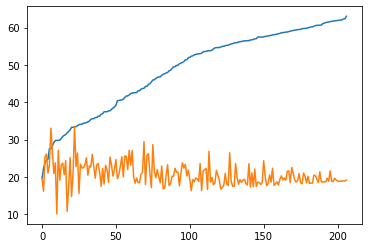

In [4]:
plt.plot(node_info[:,0])
plt.plot(node_info[:,1])


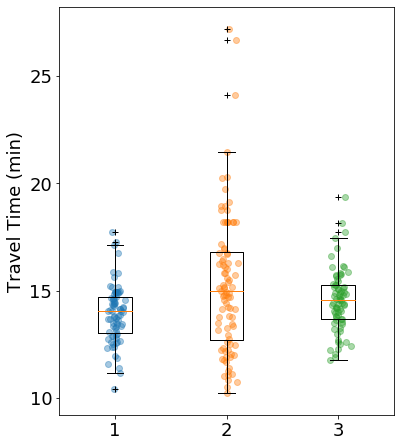

In [13]:
fig, ax = plt.subplots(figsize=(6,7.5))

vals = [
    timestamp_data[:, int(node_info[109, 2])] - np.random.randint(0,2),
    timestamp_data[:, int(node_info[106, 2])],
    timestamp_data[:, int(node_info[115, 2])],
    
    
    
]

xs = []
for i in range(3):
    vals[i] = np.unique(vals[i])
    vals[i][vals[i]<35.0] = np.max(vals[i]) - np.random.randint(1,20)
    xs.append(np.random.normal(i+1, 0.04, len(vals[i])))


for i in range(3):
    vals[i] = vals[i] * -1

names = ['1', '2', '3']


plt.boxplot(vals, labels=names, sym='+')
ngroup = len(vals)
clevels = np.linspace(0., 1., ngroup)

for x, val, clevel in zip(xs, vals, clevels):
    plt.scatter(x, val, alpha=0.4)


ax.set_yticks([-70, -60, -50, -40,])
ax.set_yticklabels(['10', '15', '20', '25'])

ax.set_ylabel('Travel Time (min)', fontsize = 18)
ax.tick_params(labelsize=18)


# plt.show()
plt.savefig('/home/wuying/CODE/mymodel/2022/DL-Traff-Graph/results/figures/reference/boxplot.pdf', bbox_inches='tight')

In [202]:
vals = [
    timestamp_data[:, int(node_info[115, 2])],
    timestamp_data[:, int(node_info[106, 2])],
    timestamp_data[:, int(node_info[109, 2])]+ np.random.randint(0,5),
]

In [206]:
vals[0].shape

(75,)

In [91]:
vals[1]

array([63.125     , 68.        , 62.44444444, 56.11111111, 59.77777778,
       57.75      , 58.77777778, 66.5       , 68.33333333, 57.        ,
       41.75      , 52.44444444, 50.55555556, 52.11111111, 63.33333333,
       67.22222222, 59.77777778, 31.88888889, 56.55555556, 52.81895265,
       26.88888889, 64.5       , 64.75      , 21.71428571, 52.81895265,
       49.375     , 59.        , 61.75      , 65.375     , 67.77777778,
       62.5       , 57.25      , 57.25      , 60.125     , 60.375     ,
       66.66666667, 52.81895265, 58.        , 30.75      , 51.75      ,
       56.        , 47.11111111, 63.44444444, 66.14285714, 58.375     ,
       64.11111111, 49.5       , 57.625     , 60.44444444, 66.        ,
       68.        , 51.75      , 59.66666667, 52.81895265, 21.        ,
       60.5       , 65.        , 66.5       , 59.5       , 59.22222222,
       35.55555556, 58.33333333, 58.        , 66.22222222, 67.875     ,
       56.11111111, 61.66666667, 58.375     , 52.81895265, 62.37

In [18]:
data = np.load('coverage_interval_96.npz')
data.files

FileNotFoundError: [Errno 2] No such file or directory: 'coverage_interval_96.npz'

In [20]:
coverage_list = data['coverage_list']
interval_list = data['interval_list']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [21]:
node = coverage_list.shape[1]

NameError: name 'coverage_list' is not defined

In [22]:
node_idx = 0

node_coverage = coverage_list[:,node_idx]
node_coverage = np.reshape(node_coverage, (96,96))

node_interval = interval_list[:, node_idx]
node_interval = np.reshape(node_interval, (96,96))

NameError: name 'coverage_list' is not defined

In [23]:
# plt.imshow(node_coverage)
# plt.colorbar()

In [24]:
# plt.imshow(node_interval)
# plt.colorbar()

In [25]:
interval_t = []
coverage_t = []
for t in range(node):
    idx_t = np.where(coverage_list[:,t] >= 0.88)[0]
    if len(idx_t):
        idx_t = idx_t[0]
        # idx_t = min(idx_t[0], 70*70)
        interval_t.append(interval_list[idx_t, t])
        coverage_t.append(coverage_list[idx_t, t])
    else:
        interval_t.append(interval_list[0, t])
        coverage_t.append(coverage_list[0, t])



print(np.mean(interval_t))
print(np.mean(coverage_t))


NameError: name 'node' is not defined

In [26]:
weight = 0.4
# node_idx = 0

coverage_rec = []
interval_rec = []

for node_idx in range(node):

    interval_nor = interval_list[:, node_idx]
    interval_nor = (interval_nor - min(interval_nor)) / (max(interval_nor) - min(interval_nor))


    coverage_nor = coverage_list[:, node_idx]
    coverage_nor = (coverage_nor - min(coverage_nor)) / (max(coverage_nor) - min(coverage_nor))

    # obj = weight * interval_nor + (1-weight)* coverage_nor

    obj =  weight * interval_nor - (1-weight) * coverage_nor

    obj_min_idx = np.argmin(obj)

    coverage_rec.append(coverage_list[obj_min_idx, node_idx])
    interval_rec.append(interval_list[obj_min_idx, node_idx])


print(np.mean(coverage_rec))
print(np.mean(interval_rec))


NameError: name 'node' is not defined

In [27]:
coverage_rec

[]

In [28]:
node_idx = 10

coverage_rec = []

# for node_idx in range(node):

node_coverage = coverage_list[:, node_idx]
node_coverage = np.reshape(node_coverage, (96,96))

node_interval = interval_list[:, node_idx]
node_interval = np.reshape(node_interval, (96,96))

u_idx_rec = []
l_idx_rec = []

for u_idx in range(96):
    diff_t = np.diff(node_coverage[u_idx, :])
    l_idx = np.where(diff_t == 0)[0]
    if len(l_idx):
        l_idx = l_idx[0]
    else:
        # print('!!')
        l_idx = 0
    
    u_idx_rec.append(u_idx)
    l_idx_rec.append(l_idx)
    
print(np.unique(l_idx_rec))
print(node_coverage[u_idx_rec, l_idx_rec])
print(node_interval[u_idx_rec, l_idx_rec])

# obj_min_idx = np.argmin(obj)

# coverage_rec.append(coverage_list[obj_min_idx, node_idx])


NameError: name 'coverage_list' is not defined

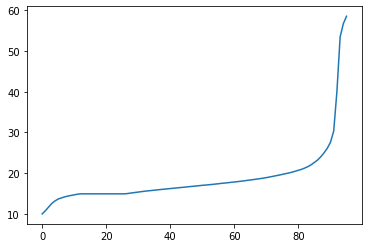

In [115]:
# plt.plot(node_coverage[u_idx_rec, l_idx_rec])
plt.plot(node_interval[u_idx_rec, l_idx_rec])

In [106]:
node_coverage

array([[0.00828698, 0.0857078 , 0.14178681, ..., 0.24338745, 0.24565785,
        0.2481553 ],
       [0.00874106, 0.10784425, 0.19082756, ..., 0.3116131 , 0.31388354,
        0.31638098],
       [0.00976274, 0.1462141 , 0.26359406, ..., 0.40572143, 0.40799183,
        0.41048926],
       ...,
       [0.1193098 , 0.5115223 , 0.81439435, ..., 0.99296176, 0.99523216,
        0.9977296 ],
       [0.1193098 , 0.5115223 , 0.81439435, ..., 0.99296176, 0.99523216,
        0.9977296 ],
       [0.1193098 , 0.5115223 , 0.81439435, ..., 0.99296176, 0.99523216,
        0.9977296 ]], dtype=float32)

In [103]:
diff_t

array([0.1069335 , 0.10764098, 0.09440064, 0.07165962, 0.06256312,
       0.0402264 , 0.03466749, 0.03042251, 0.02354962, 0.0161714 ,
       0.01627249, 0.01607037, 0.01445317, 0.01041037, 0.        ,
       0.        , 0.        , 0.        , 0.00101072, 0.01010716,
       0.00778246, 0.0071761 , 0.00596321, 0.00616533, 0.00768143,
       0.00616533, 0.00454825, 0.0044471 , 0.00262791, 0.00414389,
       0.00384074, 0.00313318, 0.00252676, 0.00293112, 0.00293106,
       0.00282997, 0.00333536, 0.00252682, 0.00282997, 0.00121289,
       0.00303209, 0.00121289, 0.00171822, 0.00101072, 0.00080854,
       0.0015161 , 0.00181925, 0.00101072, 0.00192034, 0.00181931,
       0.00121284, 0.00202143, 0.00111181, 0.00101072, 0.00101072,
       0.00111175, 0.00121289, 0.00090963, 0.00101072, 0.00090963,
       0.00121289, 0.00101066, 0.0015161 , 0.00141501, 0.00141495,
       0.00060648, 0.00090963, 0.00070751, 0.00060642, 0.00090963,
       0.00060642, 0.00060648, 0.00111175, 0.00101072, 0.00111

In [68]:
np.mean(coverage_rec)

0.9673272

In [66]:
coverage_list[:, node_idx]

array([0.08933919, 0.27829906, 0.49171492, ..., 1.        , 1.        ,
       1.        ], dtype=float32)

In [61]:
1/coverage_list[:, node_idx]

array([11.193296 ,  3.5932567,  2.0336988, ...,  1.       ,  1.       ,
        1.       ], dtype=float32)

In [62]:
coverage_nor

array([1.        , 0.25440806, 0.10140967, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [63]:
interval_nor

array([0.00387791, 0.01596006, 0.04305379, ..., 0.99542224, 0.9977629 ,
       1.        ], dtype=float32)

In [39]:
obj_min_idx

7513

In [40]:
coverage_list[obj_min_idx, node_idx]

0.9485753

In [41]:
interval_list[obj_min_idx, node_idx]


21.715014

In [42]:
coverage_nor

array([120.671234 ,  11.66755  ,   7.052842 , ...,   1.0070881,
         1.0047907,   1.0022756], dtype=float32)

In [43]:
interval_nor

array([7.4383885e-02, 8.1427948e-04, 2.1018048e-03, ..., 8.6937153e-01,
       9.2584467e-01, 1.0000000e+00], dtype=float32)

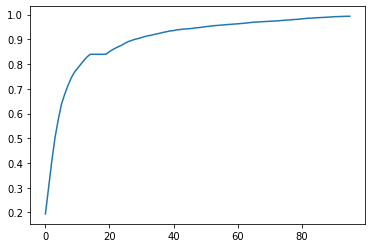

In [119]:
plt.plot(node_coverage[10,:])

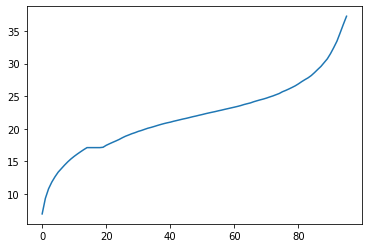

In [124]:
plt.plot(node_interval[10,:])


In [81]:
node_coverage[:,-2]


array([0.24565785, 0.31388354, 0.40799183, 0.5241231 , 0.61539334,
       0.6866841 , 0.7248269 , 0.7608128 , 0.78556025, 0.80372345,
       0.8201839 , 0.837439  , 0.8470882 , 0.8470882 , 0.8470882 ,
       0.8470882 , 0.8470882 , 0.8470882 , 0.8470882 , 0.8470882 ,
       0.8470882 , 0.8470882 , 0.8470882 , 0.8470882 , 0.8470882 ,
       0.8470882 , 0.84788287, 0.85696447, 0.86513793, 0.87308437,
       0.8813713 , 0.8890907 , 0.89510727, 0.9004427 , 0.904643  ,
       0.90872973, 0.9115677 , 0.915995  , 0.9189465 , 0.92257917,
       0.92621183, 0.92814165, 0.93075264, 0.93268245, 0.93415827,
       0.93552047, 0.93710977, 0.93847203, 0.9399478 , 0.9418776 ,
       0.94323987, 0.944148  , 0.94551027, 0.94709957, 0.9489159 ,
       0.94971055, 0.9511863 , 0.952435  , 0.9540243 , 0.955046  ,
       0.9560677 , 0.95708936, 0.95777047, 0.95913273, 0.9606085 ,
       0.96174365, 0.9631059 , 0.96390057, 0.96548986, 0.96662503,
       0.96889544, 0.9703712 , 0.97230107, 0.9741174 , 0.97570